In [1]:
import pandas as pd
import numpy as np
import nltk
import pymorphy3
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from mlxtend.preprocessing import TransactionEncoder
from wordcloud import WordCloud
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       198 non-null    int64 
 1   gender   198 non-null    object
 2   age      198 non-null    int64 
 3   income   198 non-null    int64 
 4   product  198 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [2]:
ids = df['id'].unique()
print("кол-во id",len(ids))
products = df['product'].unique()
print("кол-во продуктов",len(products))


кол-во id 198
кол-во продуктов 10


In [3]:
ids_products = [[el for el in df[df['id'] == id]['product']] for id in ids]
print(ids_products)

[['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate '], ['a milk'], ['water '], ['oil '], ['chocolate '], ['oil '], ['chocolate '], ['chocolate '], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines '], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines '], ['cigarettes '], ['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate '], ['a milk'], ['water '], ['oil '], ['chocolate '], ['oil '], ['chocolate '], ['chocolate '], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines '], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines '], ['cigarettes '], ['cigarettes '], ['a milk'], ['chocolate '], ['a milk'], ['bread'], ['bread'], ['a milk'], ['water '], ['water ']

In [4]:
te = TransactionEncoder()
te_allp = te.fit_transform(ids_products)
df = pd.DataFrame(te_allp, columns=te.columns_)
df.head()

,a milk,bread,chocolate,cigarettes,cigarettes,flakes,oil,tangerines,tangerines,water
0,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


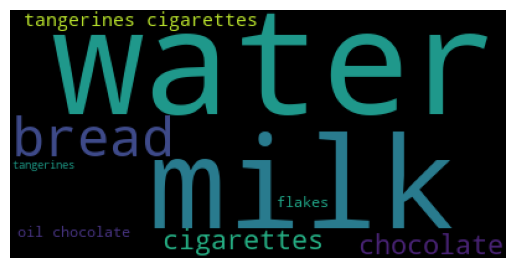

In [5]:
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
text = " ".join(df['product'])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

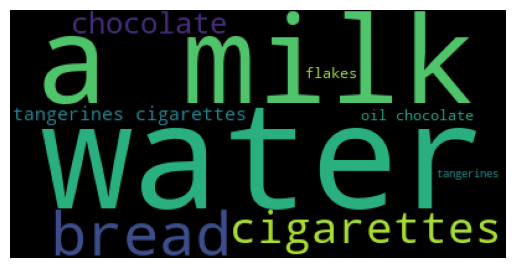

Убраны русские стоп-слова


In [6]:
stop_words = stopwords.words('russian')
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')
text = " ".join(df['product'])
cloud = WordCloud().generate(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()
print("Убраны русские стоп-слова")

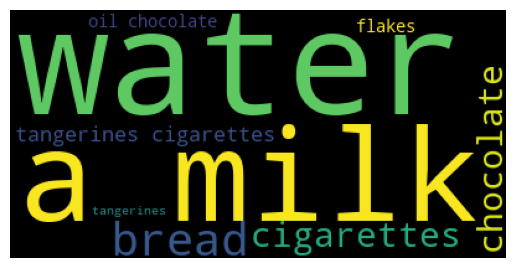

In [7]:
stop_words = stopwords.words('russian')
df = pd.read_csv('./csvs/lab5.csv',encoding='cp1251')

text = " ".join(df['product'])
text = word_tokenize(text)
morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = morph.parse(word)[0]
        text_new = text_new + ' ' + word.normal_form
    return text_new

text = lemmatize_text(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()


#### Задание

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;


In [34]:
nlp_ru_df = pd.read_json("./nlp_beat.jsonl", lines=True)
nlp_ru_df.head(5)


,question_id,question,answer,topic,author,tour_name,tour_link
0,0,Фраза «You talkin' to me?» («Это ты мне сказал...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
1,1,Немецкая панк-рок группа «The Bates» взяла сво...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
2,2,Из-за обилия секса и насилия ЭТА экранизация б...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
3,3,"ЭТОТ фильм, основанный на автобиографическом п...",NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN
4,4,В 2003 году ЭТОТ фильм режиссеров Фернанду Мей...,NaN,Фильмы не получившие «Оскар»,Алексей Абрамов,Кубок хитрого собакена,NaN


2. Вывести уникальное количество выбранных колонок;


In [33]:
print("Уникальных вопросов: ", len(nlp_ru_df.question.unique()))
print("Уникальных ответов: ", len(nlp_ru_df.answer.unique()))
print("Уникальных авторов: ", len(nlp_ru_df.author.unique()))
print("Уникальных названий туров: ", len(nlp_ru_df.tour_name.unique()))



Уникальных вопросов:  520
Уникальных ответов:  1
Уникальных авторов:  3
Уникальных названий туров:  4


3. Сформировать новый датасет из нужных столбцов;


In [37]:
cup = nlp_ru_df[['question', 'tour_name']]

cup.head(5)

,question,tour_name
0,Фраза «You talkin' to me?» («Это ты мне сказал...,Кубок хитрого собакена
1,Немецкая панк-рок группа «The Bates» взяла сво...,Кубок хитрого собакена
2,Из-за обилия секса и насилия ЭТА экранизация б...,Кубок хитрого собакена
3,"ЭТОТ фильм, основанный на автобиографическом п...",Кубок хитрого собакена
4,В 2003 году ЭТОТ фильм режиссеров Фернанду Мей...,Кубок хитрого собакена


4. Построить облако слов на основе сырых данных;


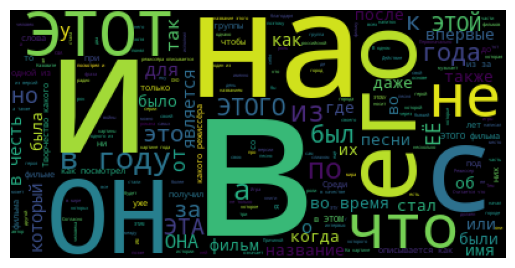

In [41]:
text = " ".join(cup['question'])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

5. Почистить стоп слова и найти леммы, построить новое облако слов;


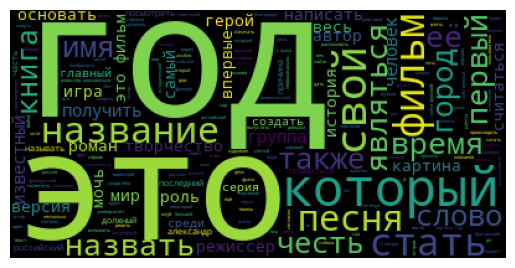

In [43]:
stop_words = stopwords.words('russian')
text = " ".join(cup['question'])
text = word_tokenize(text)
morph = pymorphy3.MorphAnalyzer()

def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = morph.parse(word)[0]
        text_new = text_new + ' ' + word.normal_form
    return text_new

text = lemmatize_text(text)
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.show()

6. Описать полученный результат.

* На первой карте преобладают служебные части речи, на второй уже лучше видны значиые слова




4я:
1) два нелинейных метода (tsne, ...)
2) мода PCA
3) отличия

5я:
1) apriori при sup(0.1,0.2,0.3) вывести itemsets длиной 2, 
2) при sup(0.3) вывести цепочки длины 2 и со словом йогурт
3) теория про apriori

6я:
1) использовать разные метрики для асоциативных правил mse, median ...
2) вывести fp граф
